<a href="https://colab.research.google.com/github/Aragnzlz/SIMULACION-I/blob/main/METODO_COMPOSICION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\textbf{METODO DE COMPOSICION}$ \\
El método de composición nos sirve para generar variables aleatorias uniformes. Mediante este método la distribución de probabilidad f(x) se expresa como una mezcla de varias distribuciones de probabilidad $f_i(x)$ seleccionadas adecuadamente.

El procedimiento para la seleccion de las $f_i(x)$ se basa en el objetivo de minimizar el tiempo de computación requerido para la generación de valores de la variable aleatoria analizada.

Los pasos requeridos para la aplicación de este método son los siguientes:



*   Dividir la distribución de probabilidad en sub-áreas.
*   Definir una distribución de probabilidad para cada sub-área.
*   Expresar la distribución de probabilidad original en la forma siguiente:
$$
f(x) = A_1f_i(x)+...+A_nf_n(x)
$$
y
$$
\sum A_i = 1
$$
* Obtener la distribución acumulada de las áreas
* generar dos números uniformes $R_1 \ y
\ R_2$
* Seleccionar la distribución $f_i(x)$ con la que se va a simular x. Para esto se usa $R_1$ y la transformada inversa.
*Usar $R_2$ para generar X

Utilizaremos el siguiente ejemplo:

De un método para general una variable con función de densidad.
$$
f(x)=\left\{\begin{array}{lll}
\frac{x-2}{2} & \text { si } & 2 \leq x \leq 3 \\
\frac{2-x / 3}{2} & \text { si } & 3 \leq x \leq 6
\end{array}\right.
$$
Para este caso utilizaremos el método de composición
1. Dividimos f(x) en dos:
$$
f_1(x) = \frac{x-1}{2}
$$
$$
f_2(x) = \frac{2-x/3}{2}
$$
2. Calculamos $A_1 \ y \ A_2$ con ayuda de la grafica.
$$
A_1 = \frac{(3-2)(0.5)}{2}= 0.25
$$
$$
A_2 = \frac{(6-3)(0.5)}{2} = 0.75
$$
Por lo que se comprueba que
$$
A_1 + A_2 = 1
$$
3. Expresamos la función de densidad como
$$
f(x) = A_1f_1(x) + A_2f_2(x) = (\frac{1}{2})(\frac{x-2}{2}) + (\frac{3}{4})(\frac{2-3/4}{2}) = \frac{3x-2}{8}
$$
4. Calculamos la distribución acumulada
Sea $p_1 = 1/4 \ y \ p_2 = 3/4$

*   Para $f_1(x)$
$$
F_1(x) = \int_{2}^{x} 4* \frac{s-2}{2}ds = 4* \frac{1}{2} \int_{2}^{s} s-2 ds = \frac{4}{2} ( \frac{x^2}{2}-2x)_{2}^{x} = 2 [\frac{x^2}{2}-2x-2+4] = x^2 - 4x+4
$$
* Para $f_2(x)$
$$
F_2(x) = \int_{2}^{x} \frac{3}{4}* \frac{2-s/3}{2}ds = \frac{4}{3} (\frac{-x^2-12x-27}{12}) = \frac{-x^2+12x-27}{9}
$$
5. Calculamos la función inversa



*  Para $F_1^{-1}(u) $
$$
x^2 - 4x+4 = u_1 → x^2-4x+4-u_1 = 0
$$
Aplicando la formula general con a = 1, b = -4 y c = $4-u_1$ obtenemos que
$$
u_1 = \frac{4 \pm \sqrt{16-4(4-u_2)}}{2} = \frac{4\pm \sqrt{4u_2}}{2} = 2 \pm \sqrt{2}
$$
*   Para $F_2^{-1}(u) $
$$
\frac{-x^2+12x-27}{9} = u_2 → x^2 -12x+27 = -9u_2  →  x^2 -12x+27 + 9u_2 = 0
$$
Aplicando la formula general con a = 1, b = -12 y c = 27 + 9 tenemos que
$$
u_2 = \frac{-12 \pm \sqrt{144-4(27+9u_2)}}{2} = \frac{-12 \pm \sqrt{36-36u_2}}{2} = \frac{12 \pm \sqrt{36(1-u_2)}}{2} = 6 \pm 3\sqrt{u_2}
$$

$\textbf{PSEUDOCODIGO}$
El pseudocódigo se genera de la siguiente manera:

1. Generar $u_1, u_2 \sim U(0,1) $
2. Si $u_1 \in [0,1/4)$
      
      Hacer $x = 2+\sqrt{u_2}$

 En otro caso
      
  Hacer $ x = 6 - 3 \sqrt{u_2}$

  3. Devolver x

In [ ]:
import random as rnd
import numpy as np #Esta libreria incluye algunas funciones matematicas. No necesitamos math
import matplotlib.pyplot as plt
import math

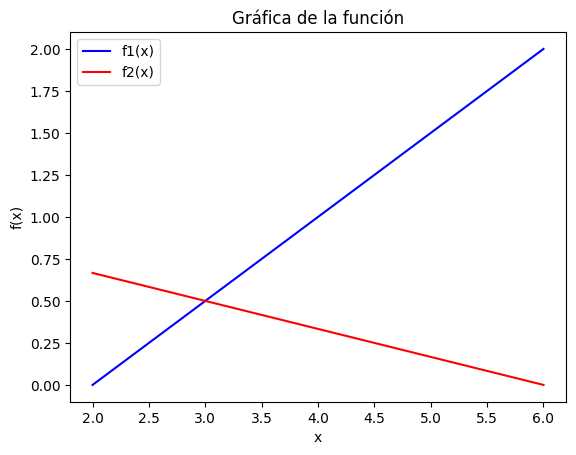

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(2, 6, 100)

y1 = (x - 2) / 2
y2 = (2 - x / 3) / 2

plt.plot(x, y1, color='blue', label='f1(x)')
plt.plot(x, y2, color='red', label='f2(x)')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de la función')
plt.legend()
plt.show()


In [ ]:
def G(n):
  Lista = []
  for i in range(n):
    #Generamos una uniforme
    u1 = rnd.random() #Genera números aleatorios entre 0 y 1
    u2 = rnd.random()
    if u1 < 1/4:
       x = 2 + math.sqrt(u2)
    else:
       x = 6 - 3*math.sqrt(u2)
    Lista.append(x)#Agregamos los elementos a una lista
  return Lista

In [ ]:
G = G(10000000)

In [ ]:
mu = np.mean(G)
print(mu)
sigma = np.var(G)
print(sigma)

3.6667913503268292
0.7226404098648364


$\textbf{HISTOGRAMA DE LA MUESTRA}$



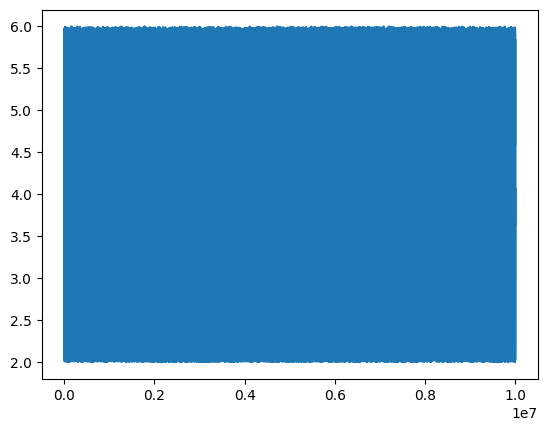

In [ ]:
plt.plot(G)

[texto del enlace](https://)$\textbf{GRAFICA DE LA f.d.p.}$

(array([ 1067.,  3098.,  5016.,  7117.,  9045., 10976., 12964., 15110.,
        17245., 19092., 20854., 23185., 24834., 27156., 28860., 31042.,
        33105., 35214., 37193., 39301., 41487., 43310., 44829., 47074.,
        49002., 50539., 52882., 55141., 57073., 59001., 61246., 63196.,
        65132., 67056., 69262., 71210., 72793., 75199., 76841., 79146.,
        80982., 83130., 84987., 86911., 88968., 90835., 93129., 95017.,
        96736., 99254., 99541., 99119., 98001., 97603., 97352., 96033.,
        95618., 95428., 94271., 93610., 92653., 92126., 91484., 90713.,
        90421., 89348., 89171., 88097., 87445., 86554., 86773., 85607.,
        84504., 84767., 83283., 82784., 82534., 81455., 81123., 80739.,
        79567., 79323., 78426., 77954., 77005., 76059., 75337., 74785.,
        74048., 73786., 72692., 72286., 71192., 70438., 70746., 69863.,
        68807., 68729., 67278., 67088., 65824., 66023., 64998., 64560.,
        63409., 63156., 62051., 61763., 61075., 59589., 60192., 

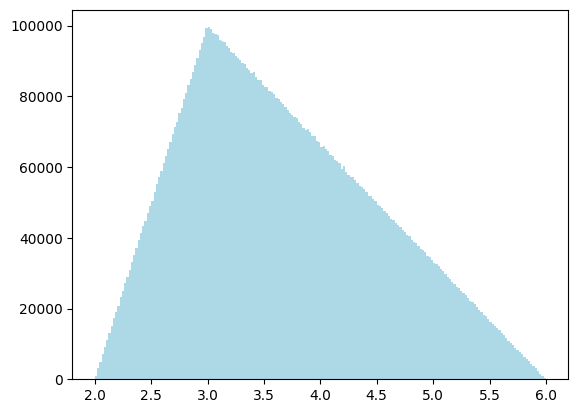

In [ ]:
plt.hist(G,bins = 200, color = "lightblue")

$\textbf{FUNCION ACUMULATIVA}$

In [ ]:
def cdf(muestra):
   n = len(muestra)
   x = np.sort(muestra)
   y = np.arange(0,n)/n
   return x,y

In [ ]:
x,y = cdf(G)

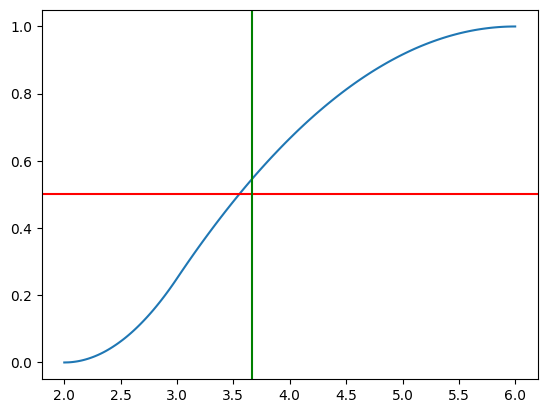

In [ ]:
plt.step(x,y)
plt.axhline(0.5, color="red")
plt.axvline(np.mean(G),color = "green")